In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Функция для нахождения линейных коэффициентов трапеции x от alpha

In [3]:
def linear_reverse(a, b):
    return 1/a, -b/a

In [4]:
# y = ax + b
def findlinearLR(df):
    a1 = 1/(df["inf1"]-df["inf0"])
    b1 = -a1 * df["inf0"]
    a2 = 1/(df["sup1"]-df["sup0"])
    b2 = -a2 * df["sup0"]
    anew1, bnew1 = linear_reverse(a1, b1)
    anew2, bnew2 = linear_reverse(a2, b2)
    return anew1, bnew1, anew2, bnew2

In [5]:
def f(x):
    return dftest['attr'].value_counts()[x]

In [6]:
# добавление обратных линейных коэффициентов в базу данных
def dfaddcolumns(df2):
    a1, b1, a2, b2 = findlinearLR(df2)
    df2['a1'] = pd.Series(a1, index=df2.index)
    df2['b1'] = pd.Series(b1, index=df2.index)
    df2['a2'] = pd.Series(a2, index=df2.index)
    df2['b2'] = pd.Series(b2, index=df2.index)
    df2['b1'] = df2['b1'].fillna(df2['inf1'])
    df2['b2'] = df2['b2'].fillna(df2['sup1'])
    counts = df2['attr'].copy()
    df2["counts"] = pd.Series(counts.apply(f), index=df2.index)
    return df2

In [7]:
# find 1 slag from integral
def integr_slag(n1, n2, a, b, t):
    coef = 1 / (n1["counts"] * n2["counts"] * t * (n1[a] + n2[a]))
    if not np.isfinite(coef):
        return 1 / (n1["counts"] * n2["counts"]) * np.exp(t * (n1[b] + n2[b]))
    e1 = np.exp(t * (n1[a] + n2[a] + n1[b] + n2[b]))
    e0 = np.exp(t * (n1[b] + n2[b]))
    e = e1 - e0
    return coef * e

In [16]:
def calculatep2(df2, t):
    res = 0
    ind = df2.index
    for i in ind:
        n1 = df2.loc[i, ["a1", "b1", "a2", "b2", "counts", "attr"]]
        for j in ind:
            n2 = df2.loc[j, ["a1", "b1", "a2", "b2", "counts", "attr"]]
            val = 0
            if n1["attr"] == n2["attr"]:
                sign = 1
            else:
                sign = -1
            w1 = integr_slag(n1, n2, "a1", "b1", t)
            w2 = integr_slag(n1, n2, "a2", "b2", t)
            res += sign * (w1 + w2)
    return (res/2)**(1/2)

In [47]:
df2 = pd.DataFrame([[0,1,2,3,1], [1,2,3,4,0]], columns=df.columns)
t = 0.1
df2 = dfaddcolumns(df2)
calculatep2(df2, t)

0.1235139258450233

In [17]:
def findbestt(df2, eps, tol=100):
    df2 = dfaddcolumns(df2)
    maxval = 0
    i = 1
    for t in np.linspace(-eps, eps, tol):
        maxval = max(maxval, calculatep2(df2, t))
    n, m = tuple(df2["counts"].value_counts())
    coef = ((n * m / (n + m)) ** (1 / 2)) / eps
    return coef * maxval

In [11]:
df = pd.read_csv("fuzzydata.csv", delimiter=";")
df = df.rename(index=str, columns={"gender":"attr"})
df.head()

,inf0,inf1,sup1,sup0,attr
0,5.350,6.000,7.000,7.750,0
1,5.575,6.150,7.500,7.500,0
2,6.350,6.350,6.575,10.000,1
3,6.025,6.100,7.525,9.425,1
4,6.250,6.275,9.950,9.950,0


In [1]:
# print(findbestt(df, 0.001), findbestt(df, 0.01), findbestt(df, 0.1))

# То, что теоретически может пригодиться (?)

In [10]:
# рандомная база данных
df = pd.DataFrame(
    [[5.35, 6, 7, 7.75, 1], 
     [5.575, 6.15, 7.5, 7.5, 0],
     [6.35, 6.35, 6.575, 10, 1],
     [6.025, 6.1, 7.525, 9.425, 1],
     [6.25, 6.275, 9.95, 9.95, 0],
    ], columns=['inf0', 'inf1', 'sup1', 'sup0', 'attr'])
df

,inf0,inf1,sup1,sup0,attr
0,5.350,6.000,7.000,7.750,1
1,5.575,6.150,7.500,7.500,0
2,6.350,6.350,6.575,10.000,1
3,6.025,6.100,7.525,9.425,1
4,6.250,6.275,9.950,9.950,0


Экспоненциальная функция от нечеткого числа

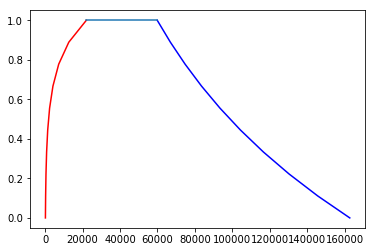

In [65]:
t = range(len(sas))
plt.plot(sas[0], sas[2], 'r')
plt.plot(sas[1], sas[2], 'b')
plt.plot([sas[0][-1], sas[1][-1]], [1, 1])
plt.show()